In [41]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import geopandas as gpd
import urllib.request
import geopy.distance

pd.options.display.max_columns = None
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
subway = pd.read_csv('Clean_Data/subway.csv')

In [11]:
subway.shape

(473, 3)

In [12]:
subway.head(1)

,OBJECTID,NAME,the_geom
0,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978)


In [32]:
subway['lon'] = subway['the_geom'].apply(lambda x: x.split('(')[1].split(')')[0].split()[0])
subway['lat'] = subway['the_geom'].apply(lambda x: x.split('(')[1].split(')')[0].split()[1])

In [36]:
subway['latlon'] = list(zip(subway.lat, subway.lon))

In [37]:
subway.head()

,OBJECTID,NAME,the_geom,lon,lat,latlon
0,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),-73.99106999861966,40.73005400028978,"(40.73005400028978, -73.99106999861966)"
1,2,Canal St,POINT (-74.00019299927328 40.71880300107709),-74.00019299927328,40.71880300107709,"(40.71880300107709, -74.00019299927328)"
2,3,50th St,POINT (-73.98384899986625 40.76172799961419),-73.98384899986625,40.76172799961419,"(40.76172799961419, -73.98384899986625)"
3,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),-73.97499915116808,40.68086213682956,"(40.68086213682956, -73.97499915116808)"
4,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),-73.89488591154061,40.66471445143568,"(40.66471445143568, -73.89488591154061)"


In [34]:
citibike = pd.read_csv('Clean_Data/citibike_station.csv')

In [38]:
citibike['latlon'] = list(zip(citibike.lat, citibike.lon))

In [39]:
citibike.head()

,capacity,lat,lon,name,short_name,station_id,latlon
0,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,"(40.72217444, -73.98368779)"
1,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05,445,"(40.72740794, -73.98142006)"
2,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02,487,"(40.73314259, -73.97573881)"
3,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08,504,"(40.73221853, -73.98165557)"
4,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01,72,"(40.76727216, -73.99392888)"


In [42]:
citibike['nearest20'] = None
citibike['nearest'] = None
citibike['nearest_station_id'] = None
nearest_20 = []
all_distance = []

for i in range(len(citibike)-1):
    distances = []
    for j in range(len(subway)-1):
        distances.append(geopy.distance.vincenty(citibike.latlon[i], subway.latlon[j]).km)
        #distance_all = distance_all.drop(0)
    
    #print(distance_all)
    #station_information['all_distance'] = distance_all
    citibike['nearest_station_id'] = citibike['station_id'][np.argsort(distances)[1]] 
    
    sorted_distances = sorted(distances)
    citibike['nearest20'][i] = sorted_distances[1:20]
    citibike['nearest'][i] = sorted_distances[1]
    nearest_20.extend(sorted_distances[1:20])
    #all_distance.extend(distances[])
    #print(sorted(distance_all)[0:20])
    if i%50 == 0:
        print(i)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800


In [43]:
citibike.head()

,capacity,lat,lon,name,short_name,station_id,latlon,nearest20,nearest,nearest_station_id
0,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,"(40.72217444, -73.98368779)","[0.5367607561835623, 0.5453619388241092, 0.881...",0.536761,3155
1,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05,445,"(40.72740794, -73.98142006)","[0.6913658407479217, 0.8460422567418772, 0.866...",0.691366,3155
2,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02,487,"(40.73314259, -73.97573881)","[0.8471698466450174, 1.1826484030347224, 1.212...",0.84717,3155
3,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08,504,"(40.73221853, -73.98165557)","[0.3498317643192239, 0.7518849560517654, 0.812...",0.349832,3155
4,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01,72,"(40.76727216, -73.99392888)","[1.018914546571723, 1.0424767741714935, 1.0504...",1.01891,3155


(array([ 2235.,  5820.,  4409.,  1921.,   492.,   235.,   104.,   156.,
          108.,    43.]),
 array([ 0.02228359,  0.67571681,  1.32915003,  1.98258325,  2.63601647,
         3.28944969,  3.9428829 ,  4.59631612,  5.24974934,  5.90318256,
         6.55661578]),
 <a list of 10 Patch objects>)

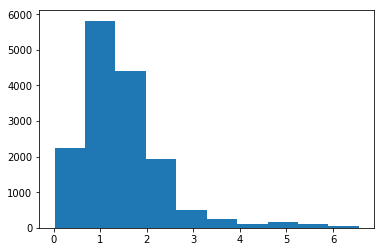

In [46]:
pl.hist(nearest_20)

In [47]:
filter_nearest = list(filter(lambda x: x<2.5, nearest_20))

(array([   31.,   146.,   387.,   586.,   849.,   982.,  1132.,  1153.,
         1154.,  1069.,   995.,   995.,   934.,   819.,   691.,   656.,
          535.,   424.,   333.,   272.]),
 array([ 0.02228359,  0.14615819,  0.27003279,  0.39390739,  0.51778199,
         0.64165658,  0.76553118,  0.88940578,  1.01328038,  1.13715498,
         1.26102957,  1.38490417,  1.50877877,  1.63265337,  1.75652797,
         1.88040256,  2.00427716,  2.12815176,  2.25202636,  2.37590096,
         2.49977556]),
 <a list of 20 Patch objects>)

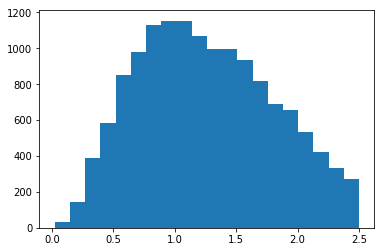

In [48]:
pl.hist(filter_nearest, 20)

In [49]:
citibike['density'] = None
for i in range(len(citibike)-1):
    citibike['density'][i] = len(list(filter(lambda x: x<1.25, citibike['nearest20'][i])))
    if i%100 == 0:
        print(i)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0
100
200
300
400
500
600
700
800


In [51]:
citibike.head()

,capacity,lat,lon,name,short_name,station_id,latlon,nearest20,nearest,nearest_station_id,density
0,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,"(40.72217444, -73.98368779)","[0.5367607561835623, 0.5453619388241092, 0.881...",0.536761,3155,13
1,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05,445,"(40.72740794, -73.98142006)","[0.6913658407479217, 0.8460422567418772, 0.866...",0.691366,3155,10
2,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02,487,"(40.73314259, -73.97573881)","[0.8471698466450174, 1.1826484030347224, 1.212...",0.84717,3155,3
3,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08,504,"(40.73221853, -73.98165557)","[0.3498317643192239, 0.7518849560517654, 0.812...",0.349832,3155,10
4,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01,72,"(40.76727216, -73.99392888)","[1.018914546571723, 1.0424767741714935, 1.0504...",1.01891,3155,8


In [57]:
labels = pd.read_csv('Clean_Data/stations_class_all.csv')

In [58]:
labels.head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
0,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1
1,445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0,1
2,487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0,1
3,504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0,1
4,72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0,5


In [59]:
#labels = labels[[0,-1]]

In [61]:
labels = labels.merge(citibike)

In [62]:
labels.head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label,capacity,lat,lon,name,short_name,latlon,nearest20,nearest,nearest_station_id,density
0,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,"(40.72217444, -73.98368779)","[0.5367607561835623, 0.5453619388241092, 0.881...",0.536761,3155,13
1,445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0,1,52,40.727408,-73.981420,E 10 St & Avenue A,5659.05,"(40.72740794, -73.98142006)","[0.6913658407479217, 0.8460422567418772, 0.866...",0.691366,3155,10
2,487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0,1,34,40.733143,-73.975739,E 20 St & FDR Drive,5886.02,"(40.73314259, -73.97573881)","[0.8471698466450174, 1.1826484030347224, 1.212...",0.84717,3155,3
3,504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0,1,44,40.732219,-73.981656,1 Ave & E 16 St,5779.08,"(40.73221853, -73.98165557)","[0.3498317643192239, 0.7518849560517654, 0.812...",0.349832,3155,10
4,72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0,5,39,40.767272,-73.993929,W 52 St & 11 Ave,6926.01,"(40.76727216, -73.99392888)","[1.018914546571723, 1.0424767741714935, 1.0504...",1.01891,3155,8


In [77]:
def NZPopCorr(col1,col2):
    ind=(labels[col1]>0)&(labels[col2]>0)
    return np.corrcoef(labels[col1][ind].astype('float'),labels[col2][ind].astype('float'))[0][1]

In [78]:
subway_dis = ['nearest', 'density']
start = ['startCount_0',  'startCount_1', 'startCount_2',  'startCount_3', 'startCount_4',  'startCount_5', 
         'startCount_6', 'startCount_7', 'startCount_8', 'startCount_9', 'startCount_10', 'startCount_11', 
         'startCount_12', 'startCount_13', 'startCount_14',  'startCount_15', 'startCount_16', 'startCount_17', 
         'startCount_18', 'startCount_19', 'startCount_20', 'startCount_21', 'startCount_22', 'startCount_23', ]
end = ['endCount_0', 'endCount_1', 'endCount_2', 'endCount_3', 'endCount_4', 'endCount_5', 
       'endCount_6', 'endCount_7', 'endCount_8', 'endCount_9', 'endCount_10', 'endCount_11', 
       'endCount_12', 'endCount_13', 'endCount_14', 'endCount_15', 'endCount_16', 'endCount_17', 
       'endCount_18', 'endCount_19', 'endCount_20', 'endCount_21', 'endCount_22', 'endCount_23']

In [88]:
print('\tSubway_dis | {}\t | {}\t |'.format(subway_dis[0],subway_dis[1]))

for A in start:
    C=[]
    for P in subway_dis:
        C+=[NZPopCorr(A,P)]   
    print('%16s   | %.4f\t | %.4f\t |'% (A,C[0],C[1]))    
    #print(A, C)

	Subway_dis | nearest	 | density	 |
    startCount_0   | -0.3050	 | 0.5080	 |
    startCount_1   | -0.2952	 | 0.4868	 |
    startCount_2   | -0.2784	 | 0.4608	 |
    startCount_3   | -0.2008	 | 0.3774	 |
    startCount_4   | -0.1720	 | 0.3583	 |
    startCount_5   | -0.1284	 | 0.2474	 |
    startCount_6   | -0.1125	 | 0.2966	 |
    startCount_7   | -0.0875	 | 0.3219	 |
    startCount_8   | -0.1201	 | 0.3719	 |
    startCount_9   | -0.2681	 | 0.5208	 |
   startCount_10   | -0.2781	 | 0.5447	 |
   startCount_11   | -0.2888	 | 0.5526	 |
   startCount_12   | -0.3107	 | 0.5725	 |
   startCount_13   | -0.3144	 | 0.5773	 |
   startCount_14   | -0.2967	 | 0.5611	 |
   startCount_15   | -0.2933	 | 0.5568	 |
   startCount_16   | -0.3333	 | 0.5992	 |
   startCount_17   | -0.3674	 | 0.6179	 |
   startCount_18   | -0.3437	 | 0.5868	 |
   startCount_19   | -0.3089	 | 0.5667	 |
   startCount_20   | -0.2965	 | 0.5446	 |
   startCount_21   | -0.3123	 | 0.5524	 |
   startCount_22   | -0.3048	 | 0.5350	 

In [89]:
print('\tSubway_dis | {}\t | {}\t |'.format(subway_dis[0],subway_dis[1]))

for A in end:
    C=[]
    for P in subway_dis:
        C+=[NZPopCorr(A,P)]   
    print('%16s   | %.4f\t | %.4f\t |'% (A,C[0],C[1]))    
    #print(A, C)

	Subway_dis | nearest	 | density	 |
      endCount_0   | -0.1620	 | 0.4129	 |
      endCount_1   | -0.1545	 | 0.3893	 |
      endCount_2   | -0.1496	 | 0.3885	 |
      endCount_3   | -0.1589	 | 0.3653	 |
      endCount_4   | -0.2036	 | 0.4471	 |
      endCount_5   | -0.2197	 | 0.4165	 |
      endCount_6   | -0.2191	 | 0.4238	 |
      endCount_7   | -0.2969	 | 0.5138	 |
      endCount_8   | -0.3860	 | 0.6059	 |
      endCount_9   | -0.3852	 | 0.6166	 |
     endCount_10   | -0.3559	 | 0.6140	 |
     endCount_11   | -0.3053	 | 0.5832	 |
     endCount_12   | -0.3291	 | 0.5855	 |
     endCount_13   | -0.3116	 | 0.5791	 |
     endCount_14   | -0.2839	 | 0.5393	 |
     endCount_15   | -0.2640	 | 0.5178	 |
     endCount_16   | -0.2538	 | 0.4982	 |
     endCount_17   | -0.2277	 | 0.4781	 |
     endCount_18   | -0.2095	 | 0.4666	 |
     endCount_19   | -0.1880	 | 0.4571	 |
     endCount_20   | -0.1663	 | 0.4363	 |
     endCount_21   | -0.1604	 | 0.4196	 |
     endCount_22   | -0.1439	 | 0.4064	 

In [90]:
subway_class = [labels[labels['label']==i] for i in range(0,6)]

In [91]:
subway_class[0].head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label,capacity,lat,lon,name,short_name,latlon,nearest20,nearest,nearest_station_id,density
6,82,85.0,109.0,18.0,77.0,25.0,49.0,18.0,60.0,25.0,114.0,43.0,114.0,322.0,119.0,302.0,249.0,1015.0,430.0,843.0,408.0,452.0,302.0,459.0,327.0,522.0,470.0,511.0,519.0,619.0,569.0,583.0,638.0,637.0,685.0,733.0,1073.0,846.0,1027.0,693.0,807.0,417.0,614.0,360.0,428.0,219.0,331.0,136.0,242.0,0,27,40.711174,-74.000165,St James Pl & Pearl St,5167.06,"(40.71117416, -74.00016545)","[0.39544213683388035, 0.5754201373432078, 0.62...",0.395442,3155,19
7,83,195.0,174.0,92.0,118.0,51.0,60.0,29.0,44.0,14.0,17.0,20.0,28.0,184.0,64.0,285.0,246.0,546.0,472.0,514.0,542.0,361.0,401.0,515.0,564.0,588.0,682.0,659.0,711.0,662.0,760.0,726.0,782.0,779.0,907.0,930.0,1080.0,1046.0,1244.0,790.0,1301.0,662.0,866.0,638.0,553.0,508.0,345.0,346.0,244.0,0,62,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,4354.07,"(40.68382604, -73.97632328)","[0.1229053960676057, 0.21097045917091095, 0.32...",0.122905,3155,16
9,120,43.0,179.0,30.0,89.0,14.0,50.0,12.0,25.0,6.0,8.0,23.0,4.0,145.0,6.0,445.0,28.0,714.0,81.0,608.0,127.0,284.0,137.0,253.0,168.0,248.0,150.0,250.0,206.0,226.0,194.0,214.0,206.0,182.0,251.0,190.0,255.0,241.0,622.0,241.0,597.0,182.0,413.0,160.0,339.0,107.0,262.0,90.0,213.0,0,19,40.686768,-73.959282,Lexington Ave & Classon Ave,4452.03,"(40.68676793, -73.95928168)","[0.5812425670011475, 0.6327356750771544, 0.652...",0.581243,3155,8
12,143,92.0,149.0,45.0,81.0,21.0,40.0,10.0,17.0,7.0,13.0,28.0,68.0,151.0,137.0,544.0,239.0,1548.0,744.0,1160.0,554.0,562.0,417.0,558.0,356.0,471.0,425.0,457.0,482.0,501.0,452.0,459.0,516.0,518.0,552.0,585.0,782.0,705.0,1165.0,645.0,1103.0,432.0,672.0,291.0,481.0,206.0,334.0,120.0,217.0,0,24,40.692395,-73.993379,Clinton St & Joralemon St,4605.04,"(40.69239502, -73.99337909)","[0.27285641578304615, 0.30007619380474637, 0.5...",0.272856,3155,12
13,144,47.0,56.0,11.0,33.0,4.0,22.0,4.0,9.0,0.0,3.0,15.0,9.0,49.0,15.0,178.0,88.0,328.0,319.0,239.0,193.0,245.0,230.0,286.0,259.0,380.0,375.0,410.0,404.0,402.0,421.0,426.0,435.0,408.0,398.0,375.0,448.0,341.0,420.0,260.0,333.0,158.0,190.0,109.0,131.0,105.0,156.0,178.0,79.0,0,19,40.698399,-73.980689,Nassau St & Navy St,4812.02,"(40.69839895, -73.98068914)","[0.8193017090211435, 0.8383011835164436, 0.859...",0.819302,3155,11


In [93]:
nearest_mean = []
density_mean = []

for item in subway_class:
    nearest_mean.append(item['nearest'].mean())
    density_mean.append(item['density'].mean())

In [94]:
nearest_mean

[0.53751672883837798,
 0.40032526477985192,
 0.89138294158900844,
 0.38725468676372188,
 0.27480650877547824,
 0.41522013433315336]

In [95]:
density_mean

[9.008064516129032,
 15.521739130434783,
 6.6269841269841274,
 16.257142857142856,
 17.5,
 15.020833333333334]